In [11]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from subtle.utils.io import write_dicoms, load_file
import matplotlib.pyplot as plt
import pydicom
import boto3
import shutil

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

<Figure size 864x720 with 0 Axes>

In [18]:
data = load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data/NO36.h5')

dirpath_ip_dicom = '/home/srivathsa/projects/studies/gad/tiantan/data/NO36/3DT1WMPRAGE_SAG_CS4_301'
dirpath_op_dicom = '/home/srivathsa/projects/studies/gad/tiantan/pptest/NO36'

data_full = np.clip(data[:, 2], 0, data[:, 2].max()) * 150

print(data_full.min(), data_full.max())

write_dicoms(dirpath_ip_dicom, data_full.astype(np.float64), dirpath_op_dicom, series_desc_post='preprocess')

0.0 1373.5277


100%|██████████| 196/196 [00:03<00:00, 55.99it/s]


0 1206


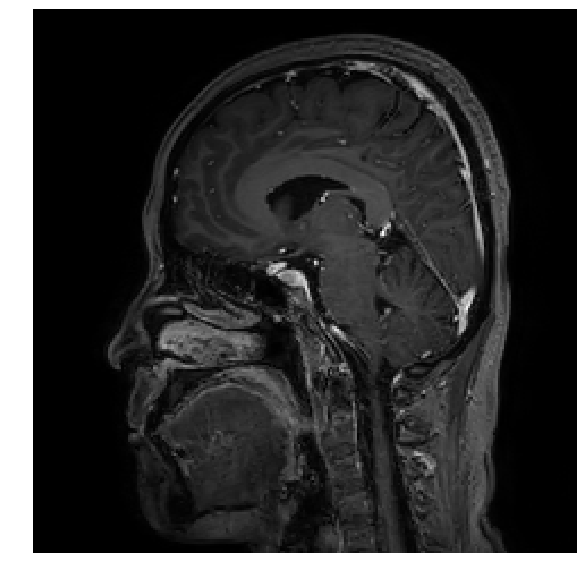

In [17]:
dcm = pydicom.dcmread('/home/srivathsa/projects/studies/gad/tiantan/data/NO36/3DT1WMPRAGE_SAG_CS4_701/IM-0003-0093.dcm').pixel_array

print(dcm.min(), dcm.max())

show_img(dcm)

In [ ]:
client = boto3.client('s3')
client.upload_file('/home/srivathsa/projects/studies/gad/stanford/pptest/Patient_0088.zip', 'subtlegad', 'Patient_0088.zip')